<center><em>Copyright by Pierian Data Inc.</em></center>
<center><em>For more information, visit us at <a href='http://www.pieriandata.com'>www.pieriandata.com</a></em></center>

# Principal Component Analysis

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Principal-Component-Analysis" data-toc-modified-id="Principal-Component-Analysis-1">Principal Component Analysis</a></span><ul class="toc-item"><li><span><a href="#Imports" data-toc-modified-id="Imports-1.1">Imports</a></span></li><li><span><a href="#Data" data-toc-modified-id="Data-1.2">Data</a></span></li><li><span><a href="#Breast-cancer-wisconsin-(diagnostic)-dataset" data-toc-modified-id="Breast-cancer-wisconsin-(diagnostic)-dataset-1.3">Breast cancer wisconsin (diagnostic) dataset</a></span></li><li><span><a href="#Manual-Construction-of-PCA" data-toc-modified-id="Manual-Construction-of-PCA-1.4">Manual Construction of PCA</a></span><ul class="toc-item"><li><span><a href="#Scaling-Data" data-toc-modified-id="Scaling-Data-1.4.1">Scaling Data</a></span></li><li><span><a href="#PCA" data-toc-modified-id="PCA-1.4.2">PCA</a></span></li><li><span><a href="#30-feature-space-=>-30-principal-componets--->-2-highest-PC" data-toc-modified-id="30-feature-space-=>-30-principal-componets--->-2-highest-PC-1.4.3">30 feature space =&gt; 30 principal componets --&gt; 2 highest PC</a></span></li></ul></li></ul></li></ul></div>

-----

## Imports

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 0 is Mean Radius, field
        10 is Radius SE, field 20 is Worst Radius.

        - class:
                - WDBC-Malignant
                - WDBC-Benign

    :Summary Statistics:

    ===================================== ====== ======
                                           Min    Max
    ===================================== ====== ======
    radius (mean):                        6.981  28.11
    texture (mean):                       9.71   39.28
    perimeter (mean):                     43.79  188.5
    area (mean):                          143.5  2501.0
    smoothness (mean):                    0.053  0.163
    compactness (mean):                   0.019  0.345
    concavity (mean):                     0.0    0.427
    concave points (mean):                0.0    0.201
    symmetry (mean):                      0.106  0.304
    fractal dimension (mean):             0.05   0.097
    radius (standard error):              0.112  2.873
    texture (standard error):             0.36   4.885
    perimeter (standard error):           0.757  21.98
    area (standard error):                6.802  542.2
    smoothness (standard error):          0.002  0.031
    compactness (standard error):         0.002  0.135
    concavity (standard error):           0.0    0.396
    concave points (standard error):      0.0    0.053
    symmetry (standard error):            0.008  0.079
    fractal dimension (standard error):   0.001  0.03
    radius (worst):                       7.93   36.04
    texture (worst):                      12.02  49.54
    perimeter (worst):                    50.41  251.2
    area (worst):                         185.2  4254.0
    smoothness (worst):                   0.071  0.223
    compactness (worst):                  0.027  1.058
    concavity (worst):                    0.0    1.252
    concave points (worst):               0.0    0.291
    symmetry (worst):                     0.156  0.664
    fractal dimension (worst):            0.055  0.208
    ===================================== ====== ======

    :Missing Attribute Values: None

    :Class Distribution: 212 - Malignant, 357 - Benign

    :Creator:  Dr. William H. Wolberg, W. Nick Street, Olvi L. Mangasarian

    :Donor: Nick Street

    :Date: November, 1995

This is a copy of UCI ML Breast Cancer Wisconsin (Diagnostic) datasets.
https://goo.gl/U2Uwz2

Features are computed from a digitized image of a fine needle
aspirate (FNA) of a breast mass.  They describe
characteristics of the cell nuclei present in the image.

Separating plane described above was obtained using
Multisurface Method-Tree (MSM-T) [K. P. Bennett, "Decision Tree
Construction Via Linear Programming." Proceedings of the 4th
Midwest Artificial Intelligence and Cognitive Science Society,
pp. 97-101, 1992], a classification method which uses linear
programming to construct a decision tree.  Relevant features
were selected using an exhaustive search in the space of 1-4
features and 1-3 separating planes.

The actual linear program used to obtain the separating plane
in the 3-dimensional space is that described in:
[K. P. Bennett and O. L. Mangasarian: "Robust Linear
Programming Discrimination of Two Linearly Inseparable Sets",
Optimization Methods and Software 1, 1992, 23-34].

This database is also available through the UW CS ftp server:

ftp ftp.cs.wisc.edu
cd math-prog/cpo-dataset/machine-learn/WDBC/

.. topic:: References

   - W.N. Street, W.H. Wolberg and O.L. Mangasarian. Nuclear feature extraction 
     for breast tumor diagnosis. IS&T/SPIE 1993 International Symposium on 
     Electronic Imaging: Science and Technology, volume 1905, pages 861-870,
     San Jose, CA, 1993.
   - O.L. Mangasarian, W.N. Street and W.H. Wolberg. Breast cancer diagnosis and 
     prognosis via linear programming. Operations Research, 43(4), pages 570-577, 
     July-August 1995.
   - W.H. Wolberg, W.N. Street, and O.L. Mangasarian. Machine learning techniques
     to diagnose breast cancer from fine-needle aspirates. Cancer Letters 77 (1994) 
     163-171.

In [2]:
df = pd.read_csv('../Data/cancer_tumor_data_features.csv')

In [3]:
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


As there are 30 features, we want to reduce it using PCA.

## Manual Construction of PCA


### Scaling Data

In [4]:
from sklearn.preprocessing import StandardScaler

In [5]:
scaler = StandardScaler()

In [6]:
scaled_X = scaler.fit_transform(df)

In [7]:
scaled_X

array([[ 1.09706398, -2.07333501,  1.26993369, ...,  2.29607613,
         2.75062224,  1.93701461],
       [ 1.82982061, -0.35363241,  1.68595471, ...,  1.0870843 ,
        -0.24388967,  0.28118999],
       [ 1.57988811,  0.45618695,  1.56650313, ...,  1.95500035,
         1.152255  ,  0.20139121],
       ...,
       [ 0.70228425,  2.0455738 ,  0.67267578, ...,  0.41406869,
        -1.10454895, -0.31840916],
       [ 1.83834103,  2.33645719,  1.98252415, ...,  2.28998549,
         1.91908301,  2.21963528],
       [-1.80840125,  1.22179204, -1.81438851, ..., -1.74506282,
        -0.04813821, -0.75120669]])

In [8]:
scaled_X.mean(axis=0)

array([-1.37363271e-16,  6.86816353e-17, -1.24875700e-16, -2.18532476e-16,
       -8.36667193e-16,  1.87313551e-16,  4.99502802e-17, -4.99502802e-17,
        1.74825981e-16,  4.74527662e-16,  2.37263831e-16, -1.12388130e-16,
       -1.12388130e-16, -1.31119486e-16, -1.52972733e-16,  1.74825981e-16,
        1.62338411e-16,  0.00000000e+00,  8.74129903e-17, -6.24378502e-18,
       -8.24179623e-16,  1.24875700e-17, -3.74627101e-16,  0.00000000e+00,
       -2.37263831e-16, -3.37164391e-16,  7.49254203e-17,  2.24776261e-16,
        2.62238971e-16, -5.74428222e-16])

In [9]:
# Because we scaled the data, this won't produce any change.
# We've left if here because you would need to do this for unscaled data
scaled_X -= scaled_X.mean(axis=0)

scaled_X

array([[ 1.09706398, -2.07333501,  1.26993369, ...,  2.29607613,
         2.75062224,  1.93701461],
       [ 1.82982061, -0.35363241,  1.68595471, ...,  1.0870843 ,
        -0.24388967,  0.28118999],
       [ 1.57988811,  0.45618695,  1.56650313, ...,  1.95500035,
         1.152255  ,  0.20139121],
       ...,
       [ 0.70228425,  2.0455738 ,  0.67267578, ...,  0.41406869,
        -1.10454895, -0.31840916],
       [ 1.83834103,  2.33645719,  1.98252415, ...,  2.28998549,
         1.91908301,  2.21963528],
       [-1.80840125,  1.22179204, -1.81438851, ..., -1.74506282,
        -0.04813821, -0.75120669]])

In [10]:
# as we are only interested in covariance across the features, not each rows.. we put rowvar=False
# Grab Covariance Matrix
covariance_matrix = np.cov(scaled_X, rowvar=False)

In [11]:
# Get Eigen Vectors and Eigen Values
eigen_values , eigen_vectors = np.linalg.eig(covariance_matrix)

In [12]:
eigen_vectors

array([[ 2.18902444e-01, -2.33857132e-01, -8.53124284e-03,
         4.14089623e-02, -3.77863538e-02,  1.87407904e-02,
         1.24088340e-01,  7.45229622e-03, -2.23109764e-01,
         9.54864432e-02,  4.14714866e-02,  5.10674568e-02,
         1.19672116e-02, -5.95061348e-02, -5.11187749e-02,
         1.50583883e-01, -2.02924255e-01, -1.46712338e-01,
        -2.25384659e-01, -7.02414091e-01,  2.11460455e-01,
        -2.11194013e-01, -1.31526670e-01,  1.29476396e-01,
         1.92264989e-02, -1.82579441e-01,  9.85526942e-02,
        -7.29289034e-02, -4.96986642e-02,  6.85700057e-02],
       [ 1.03724578e-01, -5.97060883e-02,  6.45499033e-02,
        -6.03050001e-01,  4.94688505e-02, -3.21788366e-02,
        -1.13995382e-02, -1.30674825e-01,  1.12699390e-01,
         2.40934066e-01, -3.02243402e-01,  2.54896423e-01,
         2.03461333e-01,  2.15600995e-02, -1.07922421e-01,
         1.57841960e-01,  3.87061187e-02,  4.11029851e-02,
        -2.97886446e-02, -2.73661018e-04, -1.05339342e-

In [13]:
eigen_values

array([1.33049908e+01, 5.70137460e+00, 2.82291016e+00, 1.98412752e+00,
       1.65163324e+00, 1.20948224e+00, 6.76408882e-01, 4.77456255e-01,
       4.17628782e-01, 3.51310875e-01, 2.94433153e-01, 2.61621161e-01,
       2.41782421e-01, 1.57286149e-01, 9.43006956e-02, 8.00034045e-02,
       5.95036135e-02, 5.27114222e-02, 4.95647002e-02, 1.33279057e-04,
       7.50121413e-04, 1.59213600e-03, 6.91261258e-03, 8.19203712e-03,
       1.55085271e-02, 1.80867940e-02, 2.43836914e-02, 2.74877113e-02,
       3.12142606e-02, 3.00256631e-02])

### PCA 
### 30 feature space => 30 principal componets --> 2 highest PC


In [14]:
# as 2 PC is easy to visualize, we gonna choose 2 highest PC

In [15]:
# Choose som number of components
num_components = 2

In [16]:
# we want to grab indexes of the top 2 values by Decending order
# Get index sorting key based on Eigen Values
sorted_key = np.argsort(eigen_values)[::-1][:num_components]
sorted_key

array([0, 1], dtype=int64)

In [17]:
# Get num_components of Eigen Values and Eigen Vectors
# As we already have top 2 indexes, we gonna grab the values now
eigen_values, eigen_vectors = eigen_values[sorted_key], eigen_vectors[:, sorted_key]

In [18]:
# Dot product of original data and eigen_vectors are the principal component values
# This is the "projection" step of the original points on to the Principal Component
principal_components = np.dot(scaled_X, eigen_vectors)

In [19]:
principal_components

array([[ 9.19283683,  1.94858307],
       [ 2.3878018 , -3.76817174],
       [ 5.73389628, -1.0751738 ],
       ...,
       [ 1.25617928, -1.90229671],
       [10.37479406,  1.67201011],
       [-5.4752433 , -0.67063679]])

Text(0, 0.5, 'Second Principal Component')

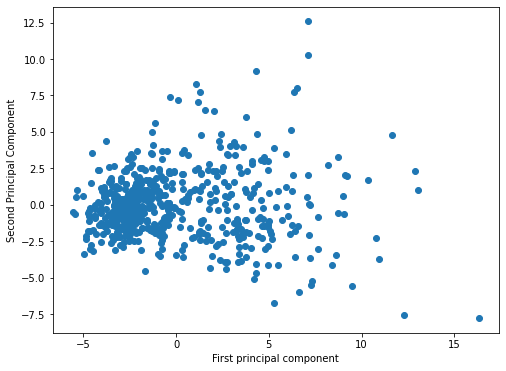

In [20]:
plt.figure(figsize=(8,6))
plt.scatter(principal_components[:,0],principal_components[:,1])
plt.xlabel('First principal component')
plt.ylabel('Second Principal Component')

In [21]:
from sklearn.datasets import load_breast_cancer

In [22]:
cancer_dictionary = load_breast_cancer()

In [23]:
cancer_dictionary.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

Text(0, 0.5, 'Second Principal Component')

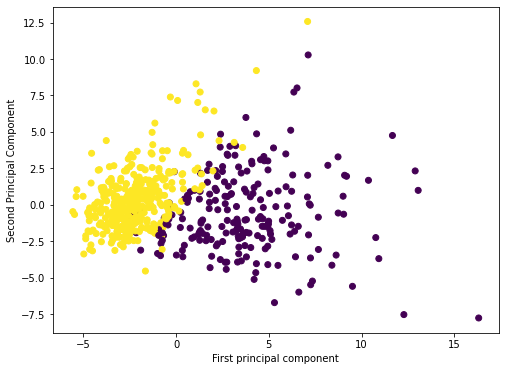

In [24]:
plt.figure(figsize=(8,6))
plt.scatter(principal_components[:,0],principal_components[:,1],c=cancer_dictionary['target'])
plt.xlabel('First principal component')
plt.ylabel('Second Principal Component')

-----